In [16]:
#Import the 3rd-party packages and Scikit-learn library( which contains the K-Means algorithm (KMA) 
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt

In [42]:
# Load csv data set into the dateframe and execute
df = pd.read_csv('customer.csv')
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [43]:
#Inserting Customer_ID index column to uniquely identify each row

df.insert(0, 'Customer_ID', range(100, 100 + len(df)))
df

,Customer_ID,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,100,2,3,12669,9656,7561,214,2674,1338
1,101,2,3,7057,9810,9568,1762,3293,1776
2,102,2,3,6353,8808,7684,2405,3516,7844
3,103,1,3,13265,1196,4221,6404,507,1788
4,104,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...,...
435,535,1,3,29703,12051,16027,13135,182,2204
436,536,1,3,39228,1431,764,4510,93,2346
437,537,2,3,14531,15488,30243,437,14841,1867
438,538,1,3,10290,1981,2232,1038,168,2125


In [46]:
df.describe()

,Customer_ID,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,319.500000,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,100.000000,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,209.750000,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,319.500000,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,429.250000,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,539.000000,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [47]:
#I decided to drop Channel & Region from field list for cluster analysis

X = df.drop(columns=['Channel', 'Region'])

In [48]:
X.head()

,Customer_ID,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,100,12669,9656,7561,214,2674,1338
1,101,7057,9810,9568,1762,3293,1776
2,102,6353,8808,7684,2405,3516,7844
3,103,13265,1196,4221,6404,507,1788
4,104,22615,5410,7198,3915,1777,5185


In [50]:
#I checked for empty cells to avoid distortion of the outcome

print(X.isna().head())
print(X.isna().sum())

   Customer_ID  Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        False  False  False    False   False             False       False
1        False  False  False    False   False             False       False
2        False  False  False    False   False             False       False
3        False  False  False    False   False             False       False
4        False  False  False    False   False             False       False
Customer_ID         0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


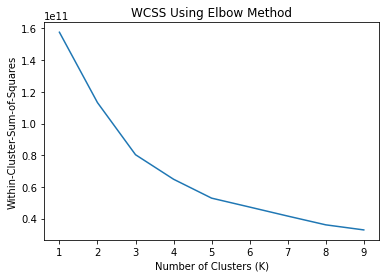

In [52]:
# I calculated the optimum number of clusters(i.e. K) using the Elbow Method. 
# As K increases, the WCSS (Within-Cluster-Sum-of-Squares) decreases. 
# That is, each data point becomes closer to its respective cluster. 
# In the chart below, the fall in WCSS starts to become less steep after at K=5. Hence, 5 is optimum number of clusters

WCSS = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)

    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)
plt.plot(range(1, 10), WCSS)
plt.title('WCSS Using Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster-Sum-of-Squares')
plt.show()

In [55]:
# I ran the KMA by using the init paramter with randon number generation for cluster centres initialization,
#..., selecting those centroids, determining the number of times the KMA will be run with the centroids, and...
#... the maximum number of KMA iterations . Here, n_clusters is a predetermined parameter

kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=400, n_init=10, random_state=0)
kmeans.fit(X)

KMeans(max_iter=400, n_clusters=5, random_state=0)

In [54]:
clusters = kmeans.predict(X)

In [56]:
#I added a column with the respective cluster numbers to the existing dataframe

Xk = X
Xk['Cluster']=clusters

In [57]:
Xk.head()

,Customer_ID,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,100,12669,9656,7561,214,2674,1338,1
1,101,7057,9810,9568,1762,3293,1776,1
2,102,6353,8808,7684,2405,3516,7844,1
3,103,13265,1196,4221,6404,507,1788,1
4,104,22615,5410,7198,3915,1777,5185,3


In [58]:
# Now to what these actually mean in terms of cluster segregation:
# From the output below, the cluster named 3 accounts for more than half of the total number of rows/transactions

Xk['Cluster'].value_counts()

1    233
3    106
2     81
0     13
4      7
Name: Cluster, dtype: int64

In [59]:
# The fresh product category appears to be highest selling group, followed by grocery

Xk.sum(axis=0)

Customer_ID          140580
Fresh               5280131
Milk                2550357
Grocery             3498562
Frozen              1351650
Detergents_Paper    1267857
Delicassen           670943
Cluster                 741
dtype: int64

In [61]:
# I exported the file to csv, renamed it and built data visualization in Tableau Desktop. 
# With this, I analysed the buying preference/behaviour in each cluster and issued recommendations, ipso facto. 

Xk.to_csv('Cust_Segmentation_Data.csv')

In [63]:
# I have shared a link to the tableau report below

%%html

https://prod-useast-a.online.tableau.com/t/afeezraheem/views/ClusterAnalysisCustomerSegmentationTableauReport/Sheet1?:origin=card_share_link&:embed=n